In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

# 데이타 전처리(Preprocessing)

- 데이타 클린징
- 결손값 처리 (Null, NaN 처리) 
- 데이터 인코딩 (레이블, 원핫인코딩)
- 데이터 스케일링
- 이상치 제거 
- 피처 선택, 추출 및 가공 

## 데이터 인코딩

- 머신러닝에서의 데이터는 숫자형으로 표현되어야한다. 
- 이를 위해 사이킷런에서 자동으로 숫자값으로 변환되는 API에는 레이블 인코딩과 원핫 인코딩이 있다 

# 레이블 인코딩(Label encoding)

: 사이킷런의 LabelEncoder 이용. 숫자형태로 변경 

- 모듈 임포트
from sklearn.preprocessing import LabelEncoder

- 인코딩 객체 생성 
encoder = LabelEncoder()

- 인코딩객체 fit => 인코딩.fit(타겟리스트) 
encoder.fit(items)

- 인코딩객체 변환및 저장 =>  인코딩.transform(타겟리스트)
labels = encoder.transform(items)

##  판다스의 apply() 활용

In [3]:
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

df = pd.DataFrame(np.array(items).reshape(-1,1), columns=['items'])
df.sort_values(by='items')

,items
0,TV
1,냉장고
6,믹서
7,믹서
4,선풍기
5,선풍기
2,전자렌지
3,컴퓨터


In [4]:
result = df.sort_values(by='items')['items']
result_list = list(result.unique())
result_list

['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터']

In [5]:
def change(item) :
    result_list = ['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터']
    return result_list.index(item)

In [7]:
change('믹서')

2

In [9]:
df['Label_encoder'] = df['items'].apply(change)

In [10]:
df

,items,Label_encoder
0,TV,0
1,냉장고,1
2,전자렌지,4
3,컴퓨터,5
4,선풍기,3
5,선풍기,3
6,믹서,2
7,믹서,2


## sklearn 의 LabelEncoder 활용

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
print(dir(LabelEncoder))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_n_features', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'fit', 'fit_transform', 'get_params', 'inverse_transform', 'set_params', 'transform']


In [13]:
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()

encoder.fit(items)

labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [14]:
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

df = pd.DataFrame(np.array(items).reshape(-1,1), columns=['items'])

encoder = LabelEncoder()

encoder.fit(items)
 
labels = encoder.transform(items)

df['Label_encoder'] = labels

In [15]:
df

,items,Label_encoder
0,TV,0
1,냉장고,1
2,전자렌지,4
3,컴퓨터,5
4,선풍기,3
5,선풍기,3
6,믹서,2
7,믹서,2


## LabelEncoder() 의 메서드와 속성 활용 

- 인코딩객체.classes_ : 원본값
- 인코딩객체.inverse_transform() : 메소드 이용 원본값 보기 


In [16]:
print(dir(encoder))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_n_features', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'classes_', 'fit', 'fit_transform', 'get_params', 'inverse_transform', 'set_params', 'transform']


In [17]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [18]:
print('디코딩 원본 값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


# 원-핫 인코딩(One-Hot encoding) 

- 원핫인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식이다. 하나만 1로 변환. 최종 2차원으로 변환

## 판다스의 get_dummies()를 이용한 원핫 인코딩

- pd.get_dummies(데이타프레임[컬럼명])
- pd.get_dummies(데이타프레임)

In [20]:
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

df = pd.DataFrame(np.array(items).reshape(-1,1), columns=['items'])
df

,items
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [21]:
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자렌지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [22]:
pd.get_dummies(df['items'])

,TV,냉장고,믹서,선풍기,전자렌지,컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


# 타이타닉 생존자 예측 

##  데이타셋 
교재에서 제공하는 타이타닉 데이타 이용
data/titanic_book.csv

##  각 피처 설명 
* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [34]:
titanic_df = pd.read_csv('~/dropbox/python숙달/data/titanic_book.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [35]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())

# null 결측치가 있는 피처 확인 - Age, Cabin, Embarked


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## NULL 컬럼들에 대한 처리 **

In [37]:
# 평균값으로 대체 
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


## 각 피처의 값의 분포 value_counts()

In [38]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
F33              3
              ... 
C103             1
A5               1
A19              1
D46              1
C91              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


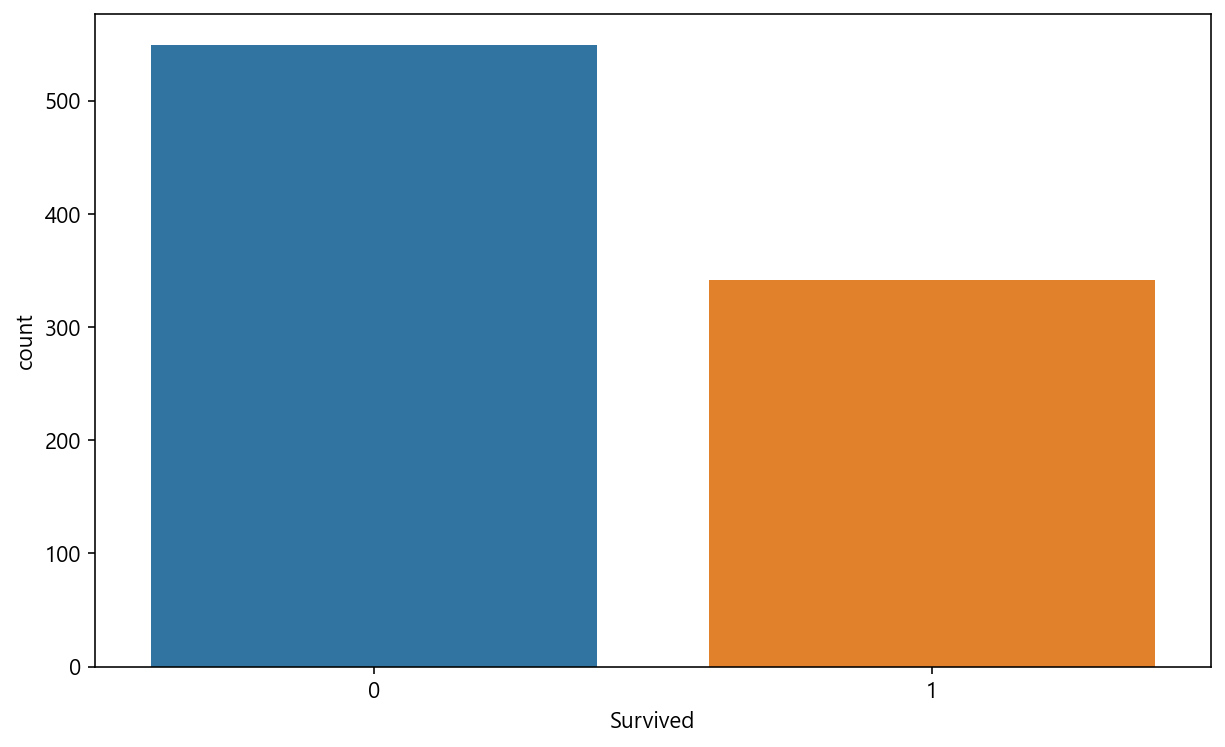

In [39]:
sns.countplot(x = 'Survived', data=titanic_df);

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

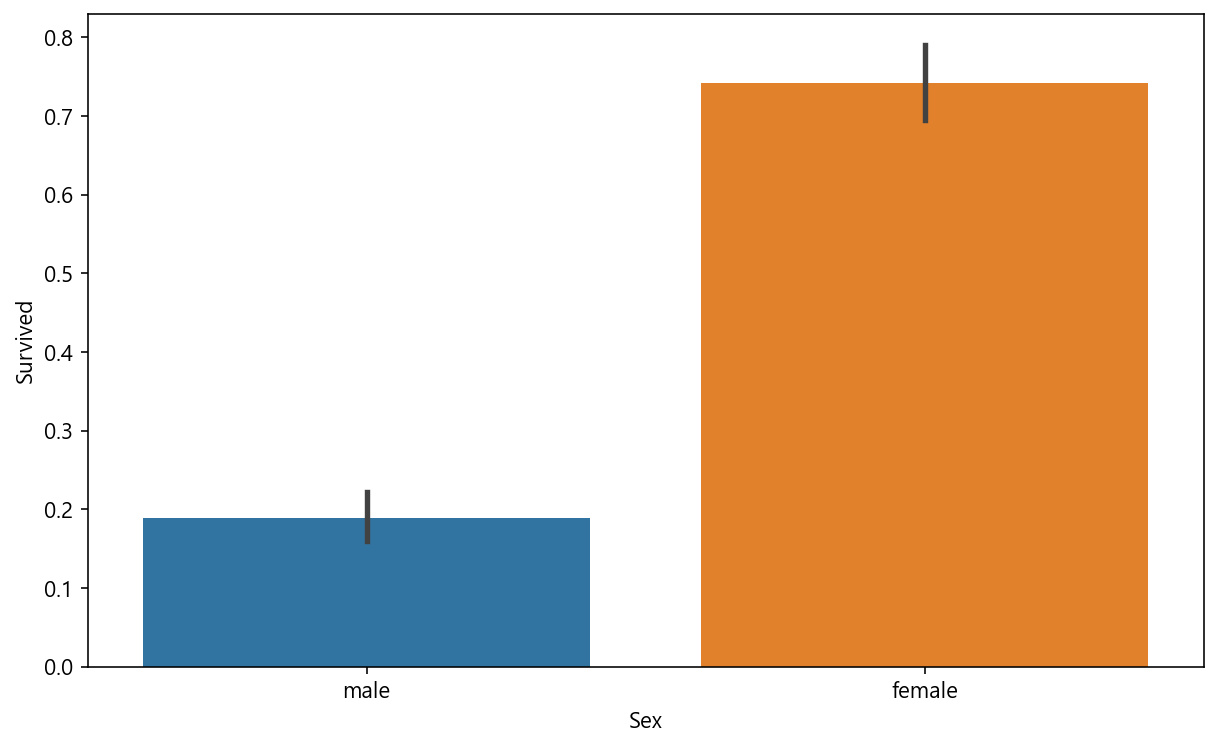

In [40]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

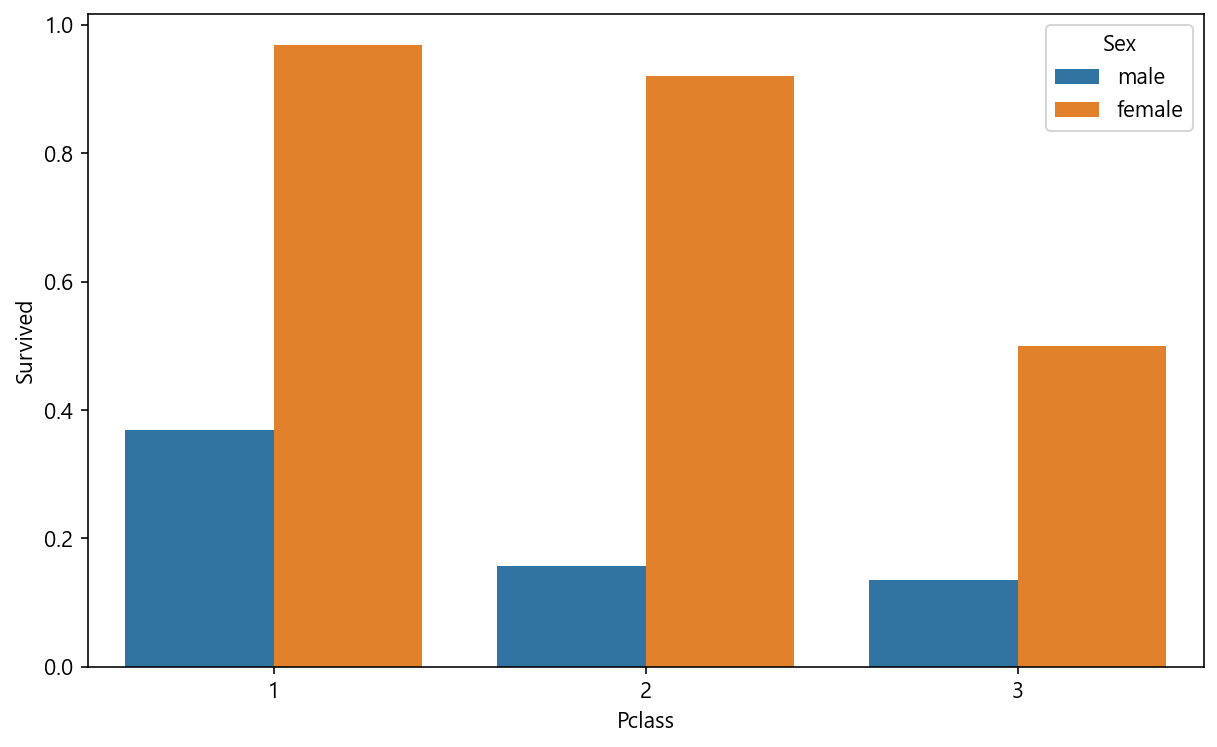

In [41]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', ci=False, data=titanic_df)

## Sex, Embarked  전처리 
- LabelEncoder()로 변환

In [42]:
from sklearn.preprocessing import LabelEncoder

In [44]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [47]:
encoder = LabelEncoder()
encoder.fit(titanic_df.Sex)
temp = encoder.transform(titanic_df.Sex)


In [48]:
titanic_df['Sex'] = temp.reshape(-1, 1)

In [50]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C


In [51]:
titanic_df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [52]:
# encoder = LabelEncoder()

encoder.fit(titanic_df['Embarked'])

temp = encoder.transform(titanic_df['Embarked'])

titanic_df['Embarked'] = temp.reshape(-1, 1)

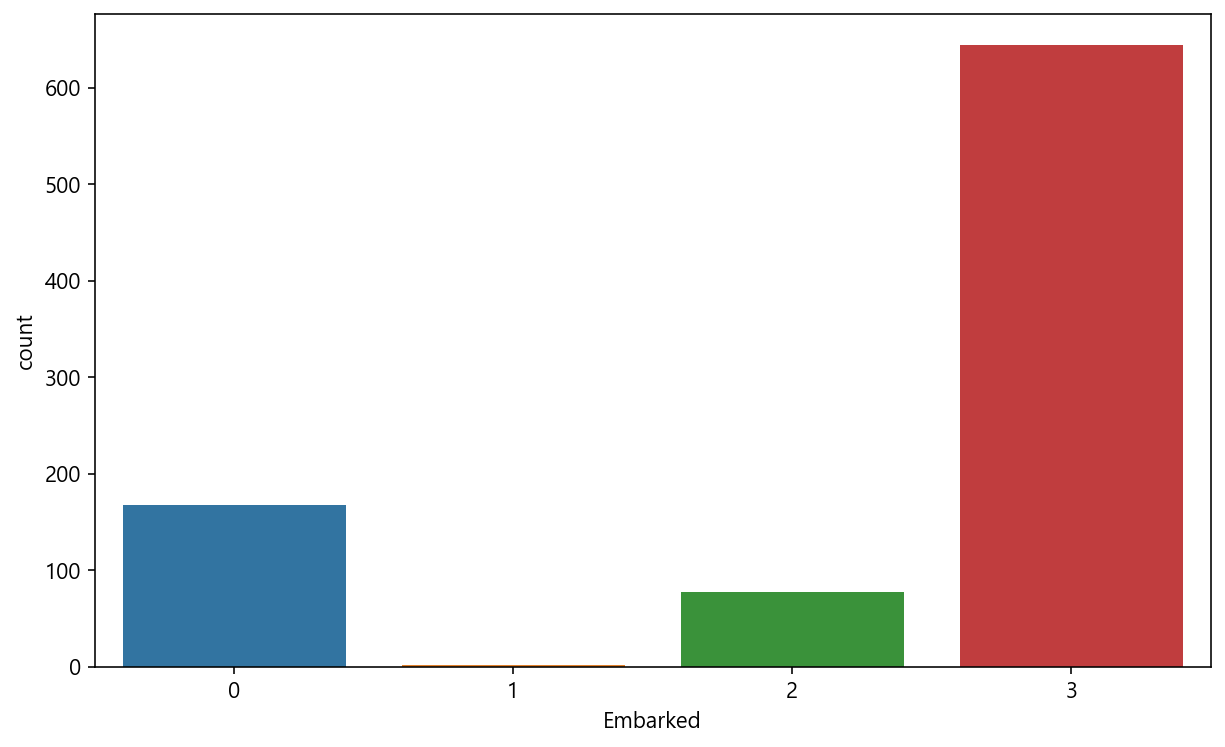

In [54]:
sns.countplot(x='Embarked', data=titanic_df);

## Cabin

In [55]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [56]:
encoder.fit(titanic_df['Cabin'])

temp = encoder.transform(titanic_df['Cabin'])

titanic_df['Cabin'] = temp.reshape(-1, 1)

## 불필요한 컬럼 삭제 m

In [57]:
titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

## 학습데이타와 테스트데이타셋으로 분리

In [80]:
X = titanic_df.iloc[:,1:]
y = titanic_df.Survived

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=11, stratify= y)

# model 사용해보기

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [90]:
model_kn = KNeighborsClassifier()
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state=11)
model_rf = RandomForestClassifier(random_state=11)

In [91]:

# KNeighborsClassifier 학습/예측/평가
model_kn.fit(X_train , y_train)
print('\n========= KNeighbors' )
print('Train score : ' ,model_kn.score(X_train, y_train))
print('Test score : ' , model_kn.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_kn.predict(X_test)):.4f}')

# LogisticRegression 학습/예측/평가
model_lr.fit(X_train , y_train)
print('\n========= LogisticRegression' )
print('Train score : ' , model_lr.score(X_train, y_train))
print('Test score : ' , model_lr.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_lr.predict(X_test)):.4f}')

# DecisionTreeClassifier 학습/예측/평가
model_dt.fit(X_train , y_train)
print('\n========= DecisionTree' )
print('Train score : ' , model_dt.score(X_train, y_train))
print('Test score : ' , model_dt.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_dt.predict(X_test)):.4f}')

# RandomForest 학습/예측/평가
model_rf.fit(X_train , y_train)
print('\n========= RandomForest' )
print('Train score : ' , model_rf.score(X_train, y_train))
print('Test score : ' , model_rf.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_rf.predict(X_test)):.4f}')



========= KNeighbors
Train score :  0.8057784911717496
Test score :  0.7313432835820896
정확도: 0.7313

========= LogisticRegression
Train score :  0.7929373996789727
Test score :  0.832089552238806
정확도: 0.8321

========= DecisionTree
Train score :  0.985553772070626
Test score :  0.7723880597014925
정확도: 0.7724

========= RandomForest
Train score :  0.985553772070626
Test score :  0.8208955223880597
정확도: 0.8209


# Quiz

타이타닉 데이타셋에서 Age 컬럼을 아래의 함수를 이용하여 세분화하여 추가하고 원핫인코딩 형태 변경하여
<br> 모델의 데이타로 활용하여라. 

In [92]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

In [127]:
titanic_df.Age = titanic_df.Age.apply(get_category)
#titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

AttributeError: 'DataFrame' object has no attribute 'Age'

In [97]:
temp3 = pd.get_dummies(titanic_df.Age)

In [101]:
titanic_df.Age

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888    Young Adult
889    Young Adult
890    Young Adult
Name: Age, Length: 891, dtype: object

In [106]:
titanic_df.drop(['Age'], axis = 1, inplace = True)

In [116]:
titanic_df = pd.concat([titanic_df, temp3], axis =1)

In [119]:
X = titanic_df.iloc[:,1:]
y = titanic_df.Survived

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=11, stratify= y)

In [121]:
model_kn = KNeighborsClassifier()
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state=11)
model_rf = RandomForestClassifier(random_state=11)

In [122]:

# KNeighborsClassifier 학습/예측/평가
model_kn.fit(X_train , y_train)
print('\n========= KNeighbors' )
print('Train score : ' ,model_kn.score(X_train, y_train))
print('Test score : ' , model_kn.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_kn.predict(X_test)):.4f}')

# LogisticRegression 학습/예측/평가
model_lr.fit(X_train , y_train)
print('\n========= LogisticRegression' )
print('Train score : ' , model_lr.score(X_train, y_train))
print('Test score : ' , model_lr.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_lr.predict(X_test)):.4f}')

# DecisionTreeClassifier 학습/예측/평가
model_dt.fit(X_train , y_train)
print('\n========= DecisionTree' )
print('Train score : ' , model_dt.score(X_train, y_train))
print('Test score : ' , model_dt.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_dt.predict(X_test)):.4f}')

# RandomForest 학습/예측/평가
model_rf.fit(X_train , y_train)
print('\n========= RandomForest' )
print('Train score : ' , model_rf.score(X_train, y_train))
print('Test score : ' , model_rf.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_rf.predict(X_test)):.4f}')



========= KNeighbors
Train score :  0.8154093097913323
Test score :  0.746268656716418
정확도: 0.7463

========= LogisticRegression
Train score :  0.8009630818619583
Test score :  0.8470149253731343
정확도: 0.8470

========= DecisionTree
Train score :  0.9582664526484751
Test score :  0.7686567164179104
정확도: 0.7687

========= RandomForest
Train score :  0.9582664526484751
Test score :  0.8283582089552238
정확도: 0.8284
